In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,7)

In [79]:
df=pd.read_csv('../Data/Top 200 Movies.csv')

In [80]:
df

,Title,Year of Release,Rating,Number of Reviews,Popularity Index,Movie Cast,Director,Description
0,The Shawshank Redemption,1994,9.3,2.6M,66,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Frank Darabont,Two imprisoned men bond over a number of years...
1,The Godfather,1972,9.2,1.8M,17,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",Francis Ford Coppola,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,9.0,2.6M,91,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Christopher Nolan,When the menace known as the Joker wreaks havo...
3,The Godfather: Part II,1974,9.0,1.2M,102,"['Al Pacino', 'Robert De Niro', 'Robert Duvall...",Francis Ford Coppola,The early life and career of Vito Corleone in ...
4,12 Angry Men,1957,9.0,771K,446,"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'...",Sidney Lumet,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...
202,Logan,2017,8.1,739K,"1,268","['Hugh Jackman', 'Patrick Stewart', 'Dafne Kee...",James Mangold,"In a future where mutants are nearly extinct, ..."
203,The Wizard of Oz,1939,8.1,394K,"2,473","['Judy Garland', 'Frank Morgan', 'Ray Bolger',...",Victor Fleming,Young Dorothy Gale and her dog are swept away ...
204,Ratatouille,2007,8.1,714K,"1,108","['Brad Garrett', 'Lou Romano', 'Patton Oswalt'...",Brad Bird,A rat who can cook makes an unusual alliance w...
205,Groundhog Day,1993,8.1,620K,794,"['Bill Murray', 'Andie MacDowell', 'Chris Elli...",Harold Ramis,"A narcissistic, self-centered weatherman finds..."


In [81]:
len(df['Title'].unique())

207

In [82]:
df['Director']=df['Director'].astype('category')

In [83]:
df['Director']=df['Director'].astype('category')

In [84]:
df['Director']=df['Director'].astype('category')

In [85]:
df['Popularity Index']=df['Popularity Index'].astype('string')
df['Popularity Index']=df['Popularity Index'].str.replace(',','')
df['Popularity Index']=df['Popularity Index'].astype('int')

In [86]:
df['Number of Reviews']=df['Number of Reviews'].str.replace('M','00000').str.replace('K',"000")

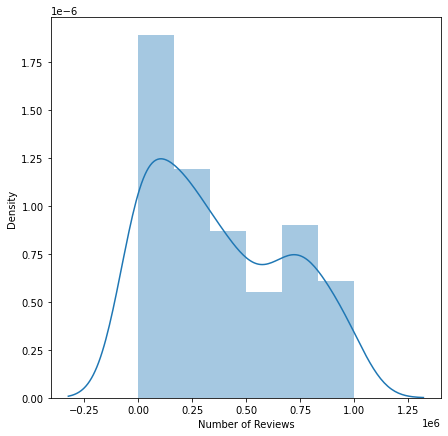

In [87]:
ax=sns.distplot(df['Number of Reviews'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

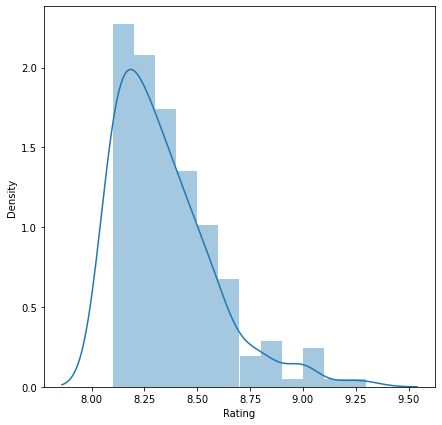

In [88]:
sns.distplot(df['Rating'])

<AxesSubplot:xlabel='Popularity Index', ylabel='Density'>

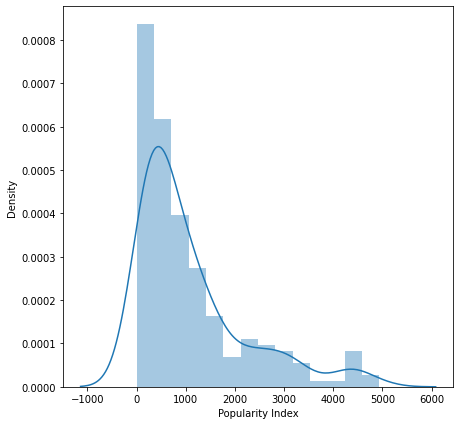

In [89]:
sns.distplot(df['Popularity Index'])

In [90]:
df.isnull().sum()

Title                0
Year of Release      0
Rating               0
Number of Reviews    0
Popularity Index     0
Movie Cast           0
Director             0
Description          0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              207 non-null    object  
 1   Year of Release    207 non-null    int64   
 2   Rating             207 non-null    float64 
 3   Number of Reviews  207 non-null    object  
 4   Popularity Index   207 non-null    int64   
 5   Movie Cast         207 non-null    object  
 6   Director           207 non-null    category
 7   Description        207 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 17.8+ KB


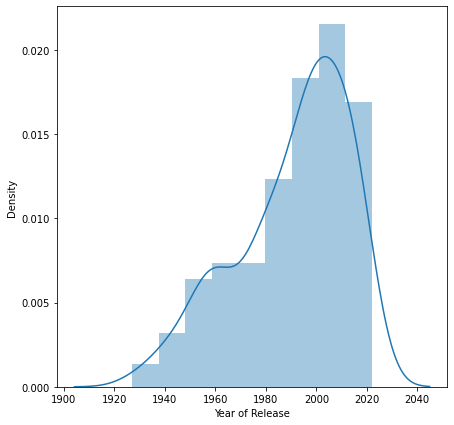

In [92]:
ax=sns.distplot(df['Year of Release'])


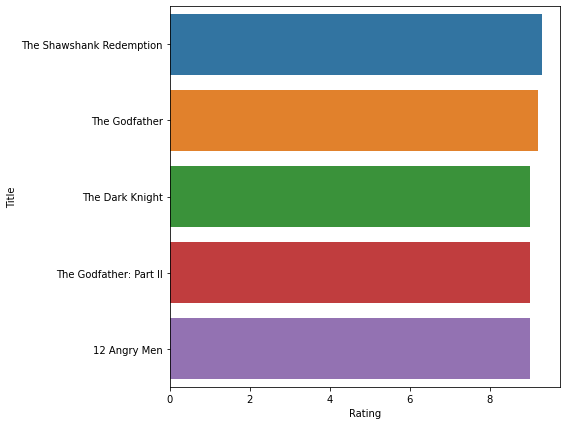

In [93]:
plt.figure(figsize=(7,7))
ax=sns.barplot(data=df[['Title','Rating']].head(),y="Title",x
               ="Rating")

In [94]:
df['Number of Reviews']=df['Number of Reviews'].astype('float')

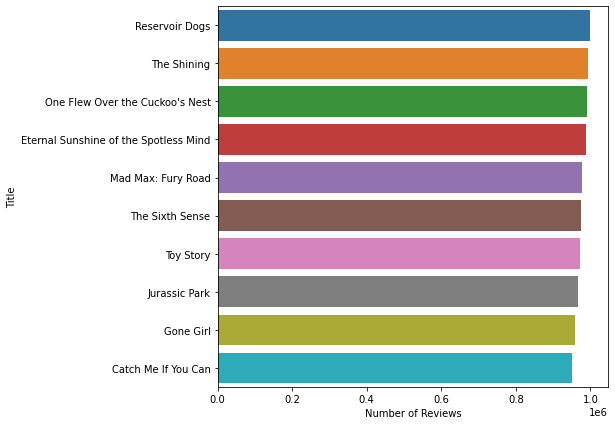

In [95]:
ax=sns.barplot(data=df[['Number of Reviews','Title']].sort_values(by='Number of Reviews',ascending=False).head(10)
               ,y='Title',x='Number of Reviews')

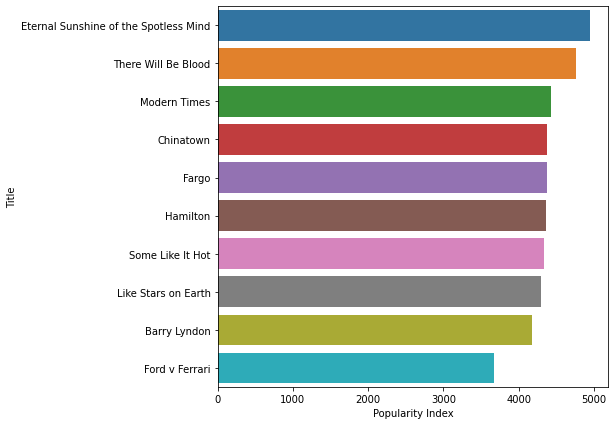

In [106]:
df[['Title','Popularity Index']]
ax=sns.barplot(data=df[['Title','Popularity Index']].sort_values(by='Popularity Index',ascending=False).head(10)
               ,y='Title',x='Popularity Index')

In [97]:
df.groupby('Director')['Title'].count().reset_index().sort_values(by='Title',ascending=False)

,Director,Title
75,Martin Scorsese,7
14,Christopher Nolan,7
114,Stanley Kubrick,7
116,Steven Spielberg,7
2,Alfred Hitchcock,5
...,...,...
46,Harold Ramis,1
44,Gus Van Sant,1
43,Guillermo del Toro,1
42,Giuseppe Tornatore,1


In [122]:
d=df.groupby('Director')['Rating'].sum().reset_index().sort_values(by='Rating',ascending=False).head(6)
d

,Director,Rating
14,Christopher Nolan,59.9
116,Steven Spielberg,58.6
75,Martin Scorsese,58.2
114,Stanley Kubrick,58.2
95,Quentin Tarantino,42.1
2,Alfred Hitchcock,41.8


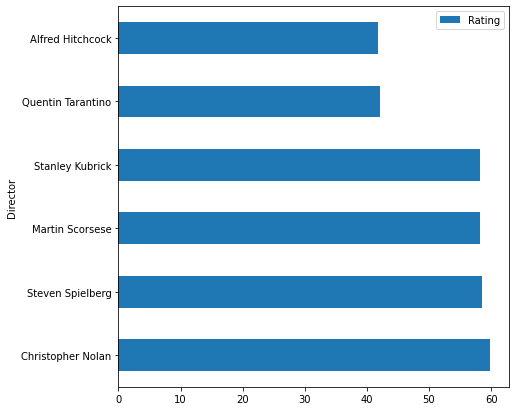

In [124]:
ax=d.plot(y='Rating',x='Director',kind='barh')